In [0]:
%matplotlib inline

# 사용할 라이브러리를 불러옵니다.
import io                                                                   # 입력(input)과 출력(output) 관련 라이브러리입니다.
import numpy as np                                                          # 배열(array)을 쉽게 사용하기 위한 라이브러리입니다.
import pandas as pd                                                         # 데이터를 쉽게 보고 사용하기 위한 라이브러리입니다.
import matplotlib.pyplot as plt                                             # 시각화 설정 클래스입니다.

from google.colab import files                                              # 구글 콜랩용 라이브러리에서 파일을 다루는 클래스입니다.

from sklearn.model_selection import train_test_split                        # 데이터를 나누는 함수입니다.
from sklearn.tree import DecisionTreeClassifier                             # 사용할 머신러닝 알고리즘입니다.
from sklearn.tree import plot_tree                                          # 의사결정나무 시각화 함수입니다.
from sklearn.metrics import classification_report, plot_confusion_matrix    # 모델 성능평가를 위한 함수입니다.

In [2]:
# 로컬PC에서 데이터를 현재 구글 콜랩 페이지에 업로드합니다.
uploaded = files.upload()

Saving iris.csv to iris (2).csv


In [0]:
# 업로드한 파일 이름을 명시합니다.
## 주의: 업로드한 파일명을 확인해주세요.
filename = 'iris.csv'

# CSV 파일을 데이터프레임 형태로 가져옵니다.
## 주의: 파일 확장자를 확인해주세요.
df = pd.read_csv(io.BytesIO(uploaded[filename]), sep=',', encoding='utf-8')

In [0]:
# 4번째 컬럼까지의 데이터를 독립변수 x로 지정합니다.
## 주의: 독립변수의 컬럼범위는 데이터마다 다를 수 있습니다.
x = df.iloc[:, :4].values

# 컬럼명으로 종속변수 y를 지정합니다.
## 주의: 종속변수의 컬럼명은 데이터마다 다를 수 있습니다.
y = df['target'].values

In [0]:
# 랜덤함수의 값을 고정합니다.
## 랜덤값을 고정하여 같은 상황에서 같은 결과를 얻기 위한 것입니다. (재현성 참조)
seed = 42

In [0]:
# 데이터 x, y를 학습용(xtr, ytr)과 테스트용(xte, yte)으로 분리합니다.
xtr, xte, ytr, yte = train_test_split(
    x,                    # 나눌 배열 x를 입력합니다.
    y,                    # 나눌 배열 y를 입력합니다.
    test_size=0.33,       # 전체 데이터의 1/3을 테스트용으로 사용합니다.
    random_state=seed,    # 랜덤함수로 추출할 초기값을 seed로 고정합니다.
    shuffle=True,         # 데이터의 순서를 섞습니다.
    stratify=y            # 배열 y의 데이터의 비율을 유지하면서 데이터를 나눕니다.
)

In [8]:
# 사용할 알고리즘을 불러옵니다.
model = DecisionTreeClassifier(
    max_depth=None,         # 의사결정나무의 최대깊이를 결정합니다.
    random_state=seed,      # 랜덤함수로 추출할 초기값을 seed로 고정합니다.
)

# 모델이 학습합니다.
model.fit(xtr, ytr)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

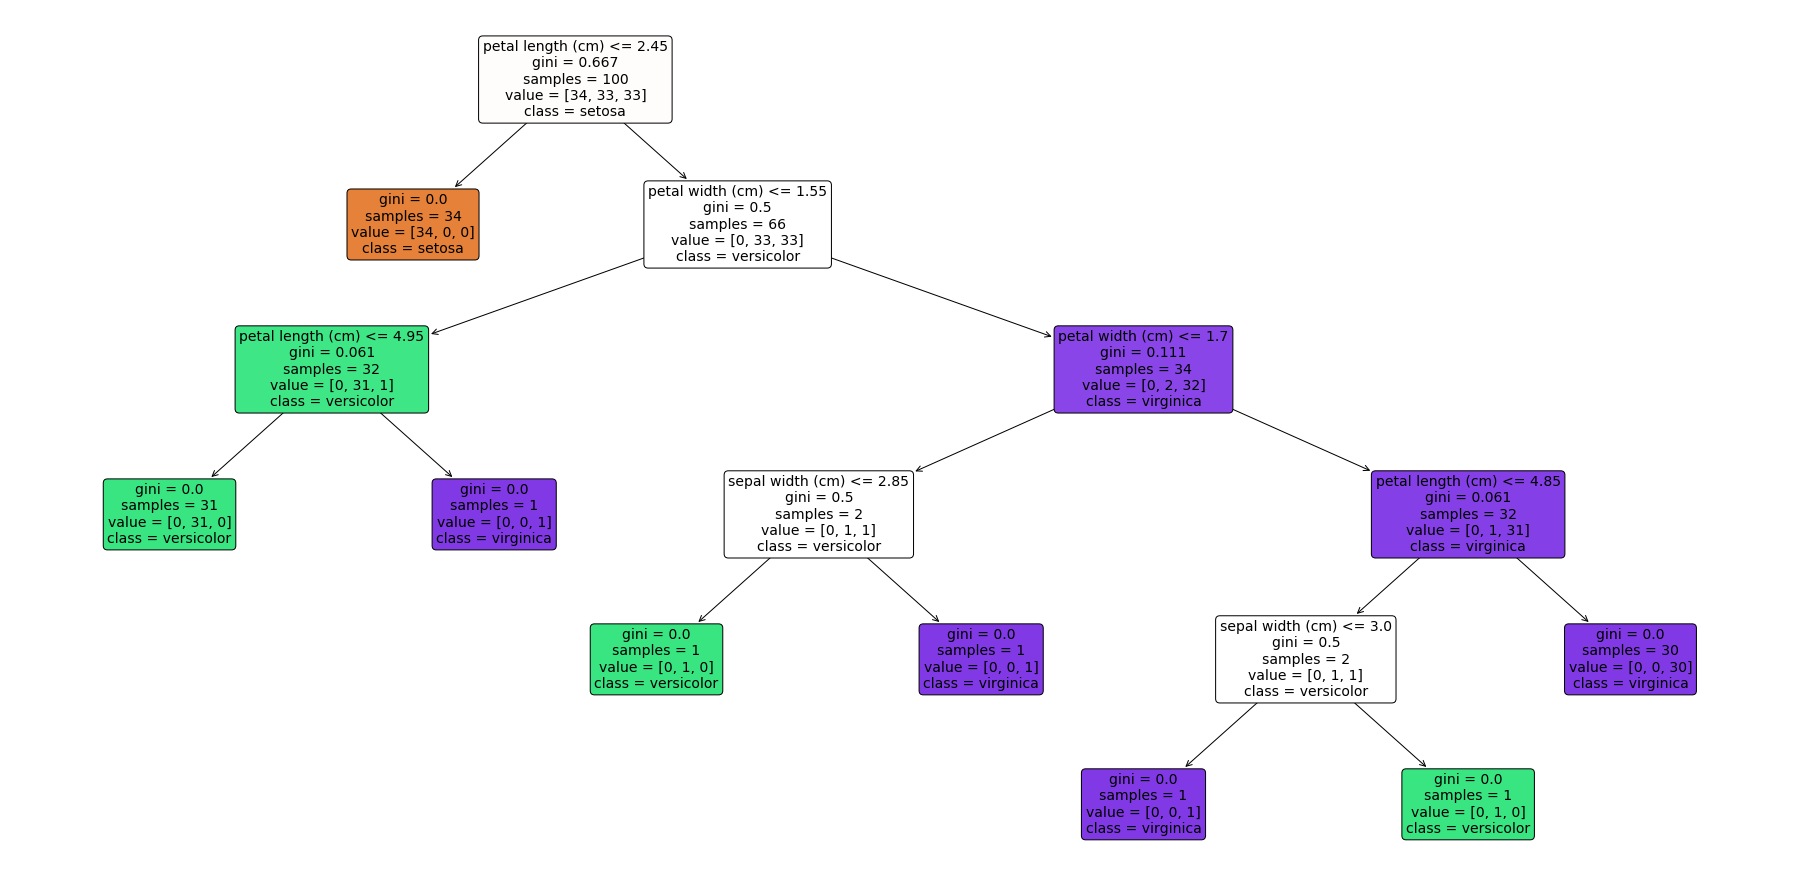

In [14]:
# 생성한 의사결정나무를 시각화합니다.
plt.figure(figsize=(32, 16))
plot_tree(
    decision_tree=model,                                  # 학습한 모델을 입력합니다.
    feature_names=df.columns[:4],                         # 컬럼명을 명시합니다.
    class_names=['setosa', 'versicolor', 'virginica'],    # 클래스 이름을 명시합니다.
    filled=True,                                          # 노드를 색칠하여 구분을 돕습니다.
    proportion=False,                                     # 비율로 표시합니다.
    rounded=True,                                         # 노드를 조금 둥글게 만듭니다.
    fontsize=14                                           # 폰트 크기를 결정합니다.
)
plt.show()

In [0]:
# 모델에 테스트 데이터 xte를 입력하여 예측값을 구합니다.
pred = model.predict(xte)

In [11]:
# 모델의 성능을 출력합니다.
print(classification_report(yte, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.82      0.90        17
           2       0.85      1.00      0.92        17

    accuracy                           0.94        50
   macro avg       0.95      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50



<Figure size 1152x576 with 0 Axes>

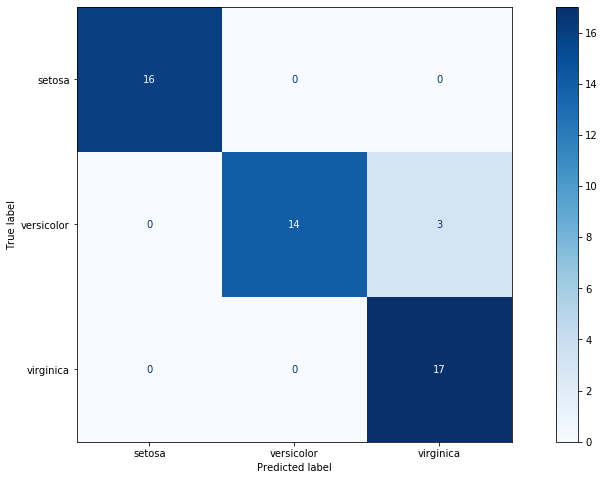

In [15]:
# Confusion matrix를 시각화합니다.
plt.figure(figsize=(16, 8))
plot_confusion_matrix(
    model,
    xte,
    yte,
    display_labels=['setosa', 'versicolor', 'virginica'],
    cmap=plt.cm.Blues
)
plt.show()